In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['avg'] = df['total_score']/3

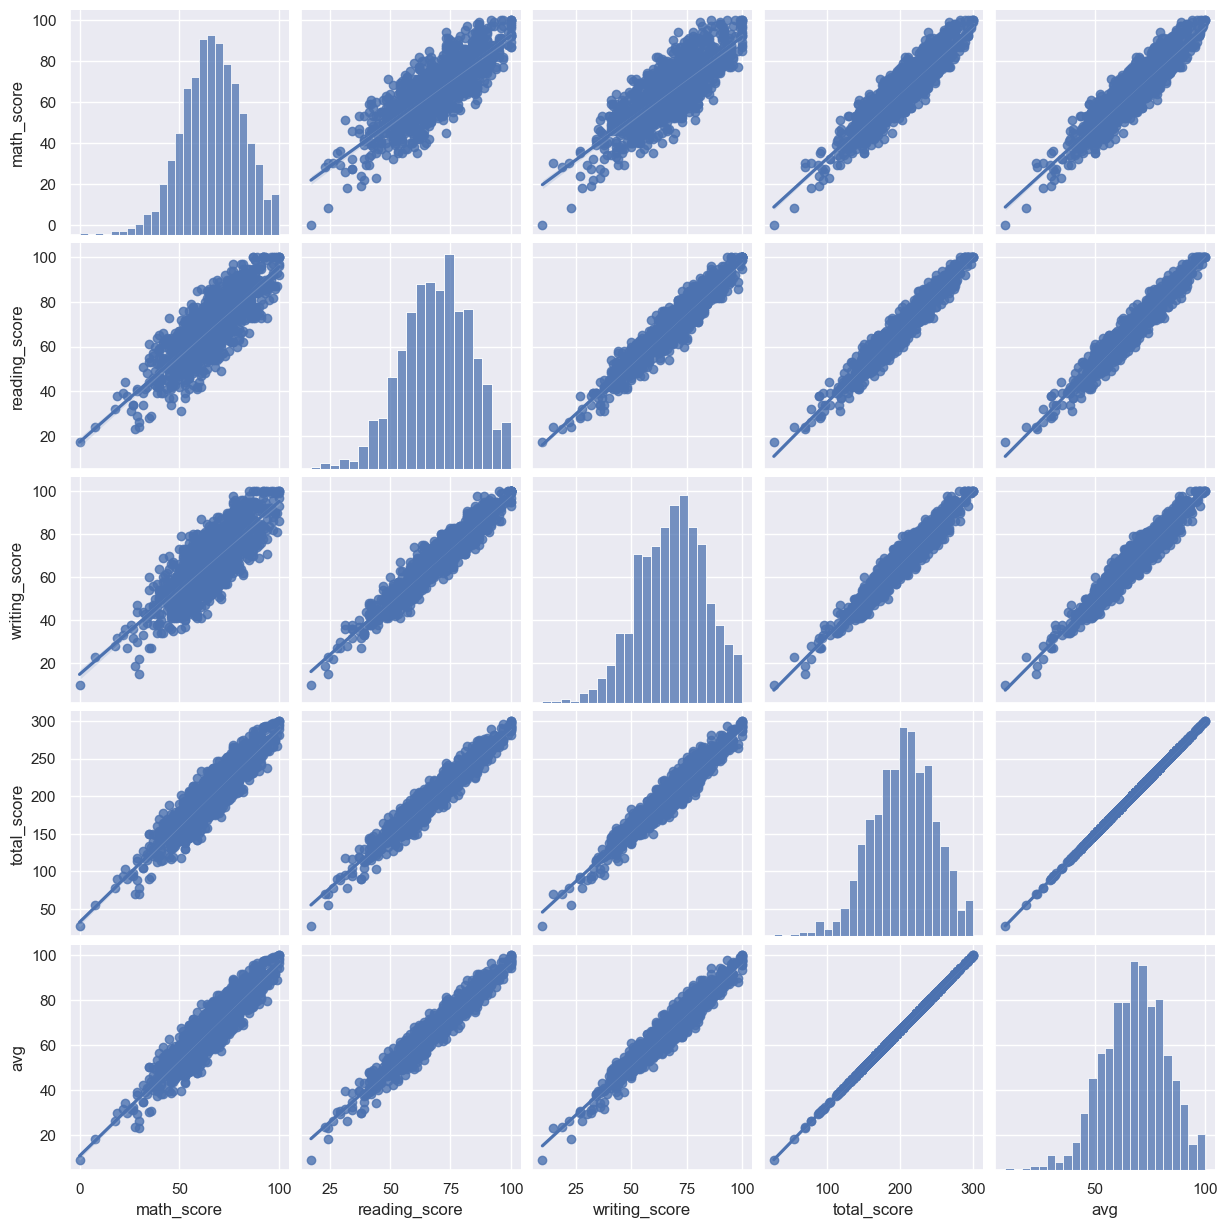

In [10]:
sns.set()
sns.pairplot(df, kind='reg')

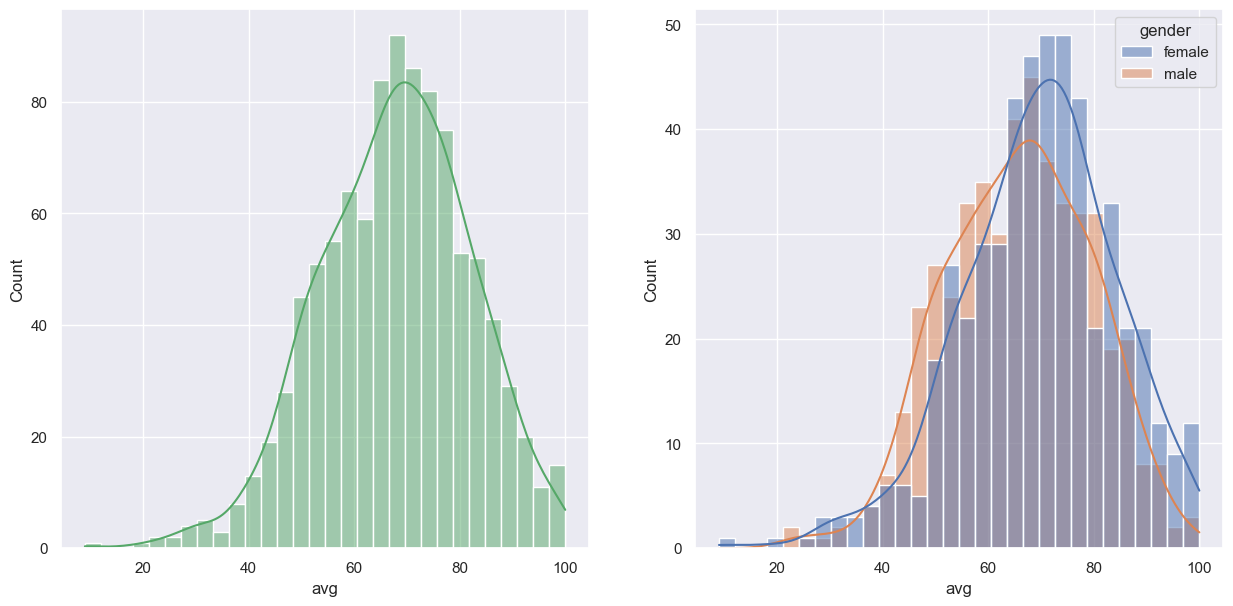

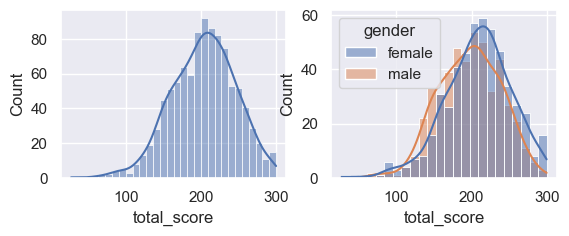

In [11]:
fig, axs=plt.subplots(2,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='avg', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg', bins=30, kde=True, hue='gender')
plt.show()
plt.subplot(221)
sns.histplot(data=df, x='total_score', bins=30, kde=True)
plt.subplot(222)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

female perform better than male.

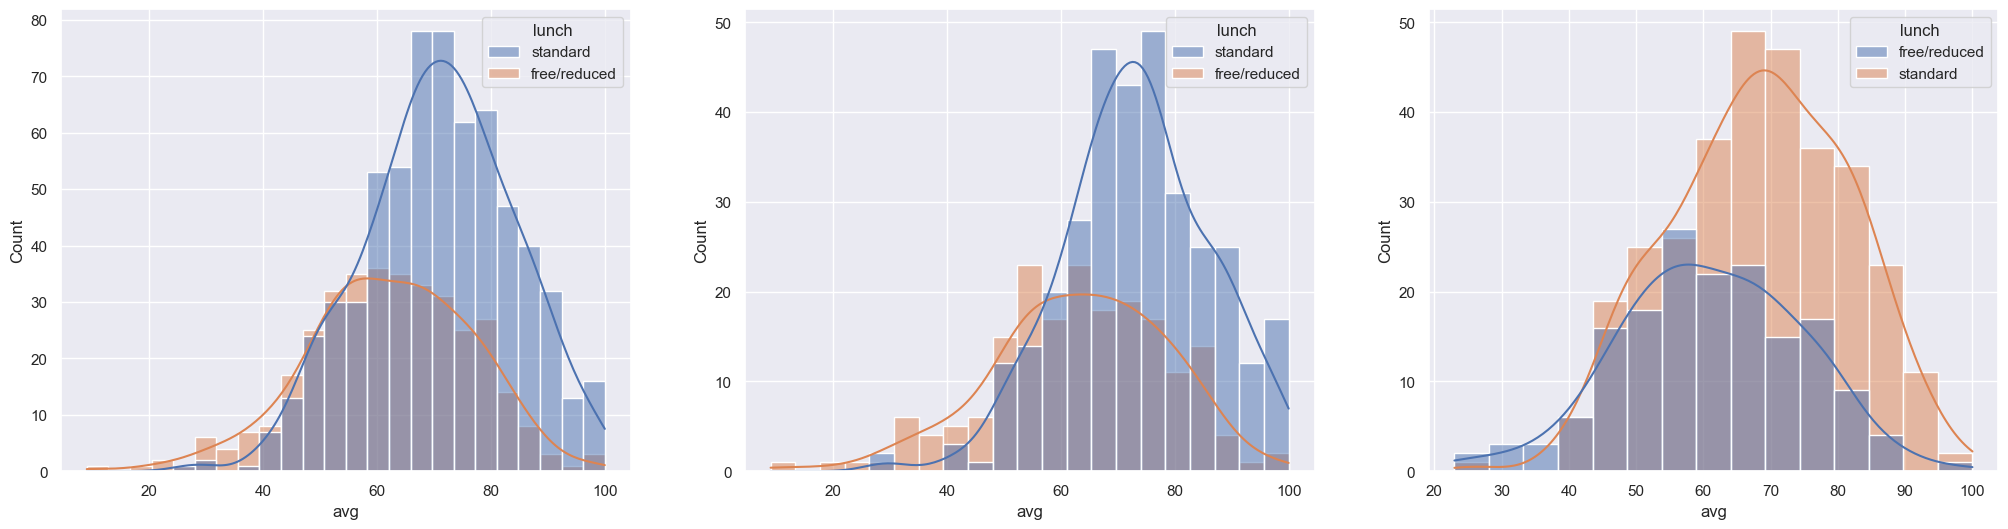

In [15]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='avg', kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='avg', kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='avg', kde=True,hue='lunch')
plt.show()

standard lunch helps perform well in exams

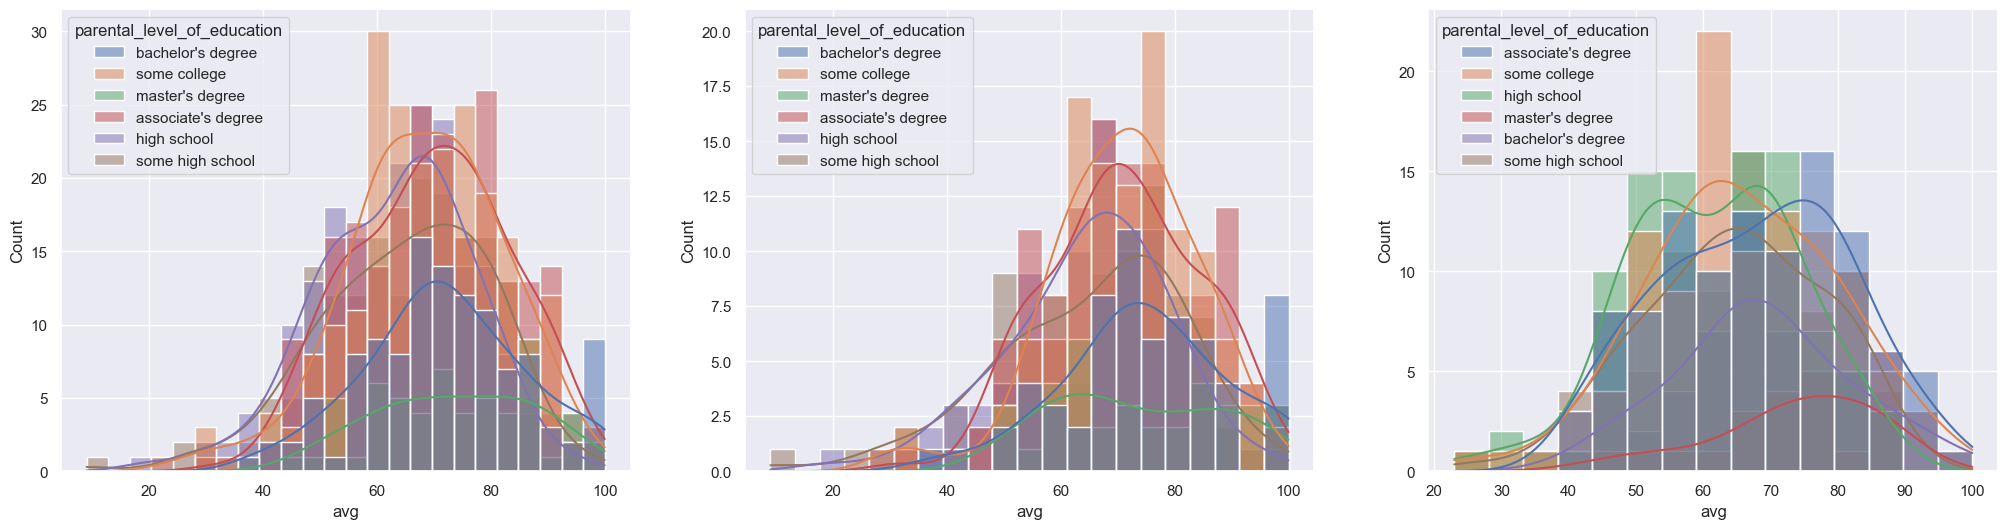

In [19]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='avg', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='avg', kde=True, hue='parental_level_of_education')
plt.show()

no significant effect of parent's education on student performance

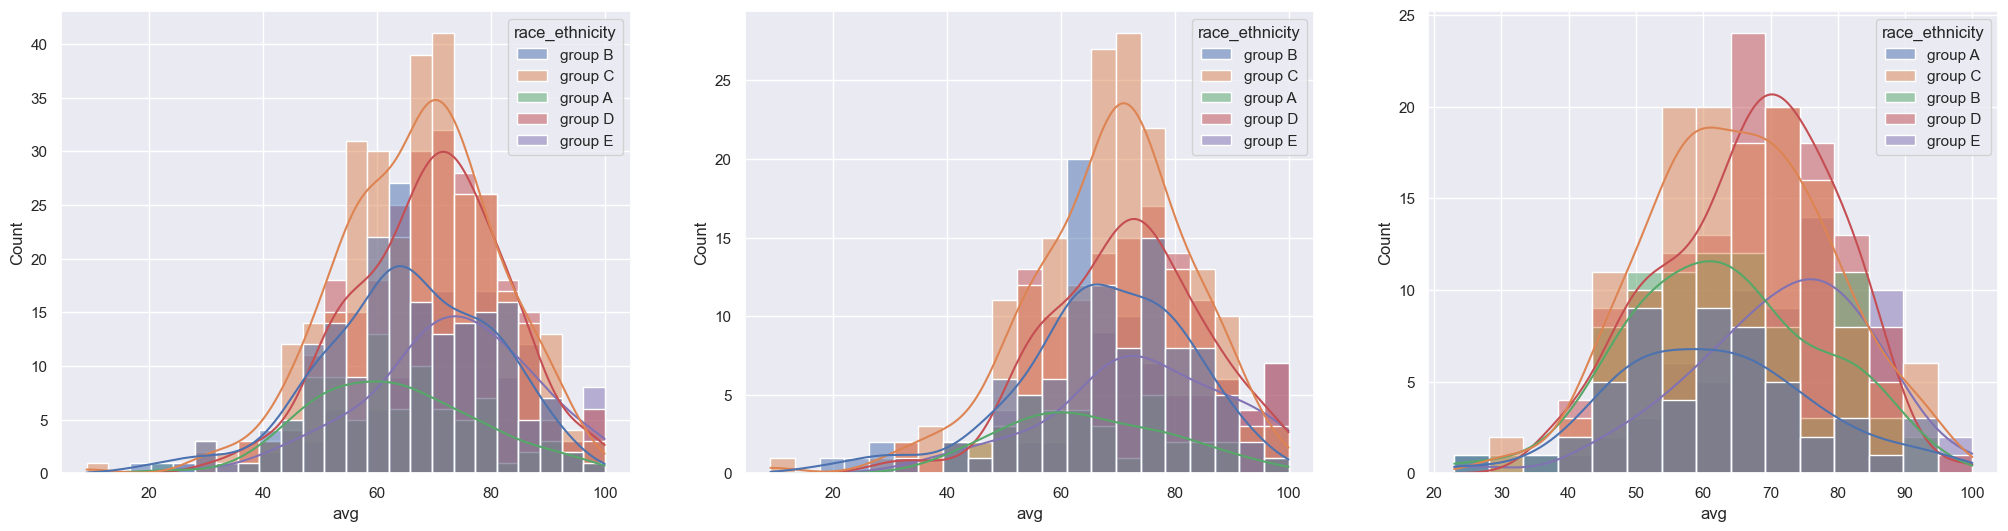

In [21]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='avg', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='avg', kde=True, hue='race_ethnicity')
plt.show()

group A and B performs poorly
group C and D performs well

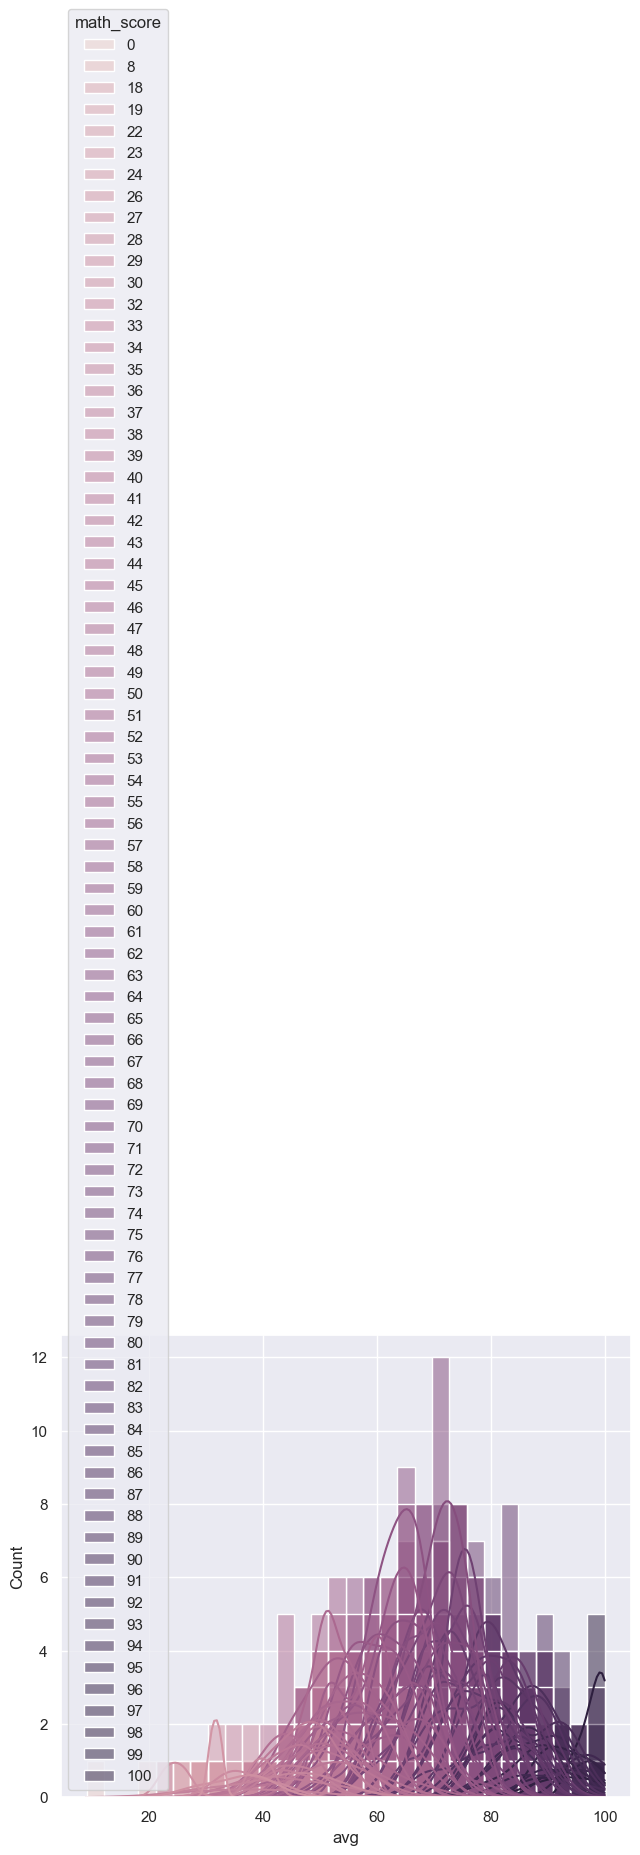

In [24]:
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg', bins=30,kde=True, hue='math_score')
plt.show()

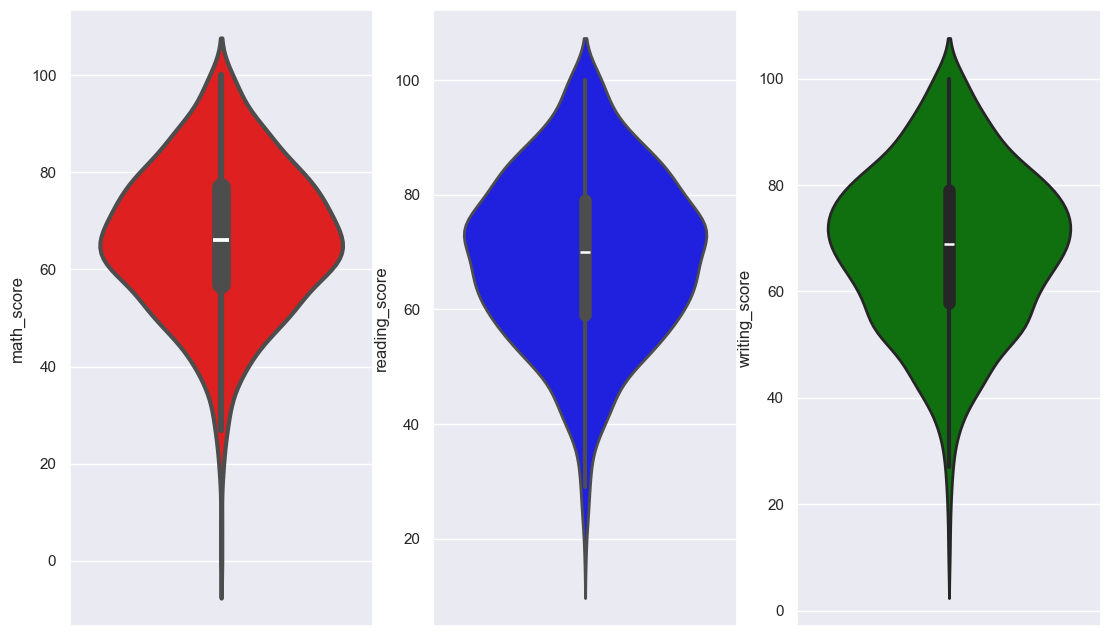

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(142)
sns.violinplot(y='reading_score', data=df, color='blue', linewidth=2)
plt.subplot(143)
sns.violinplot(y='writing_score', data=df, color='green', linewidth=2)
plt.show()

maths score in 60-80
reading and writing score in 50-80

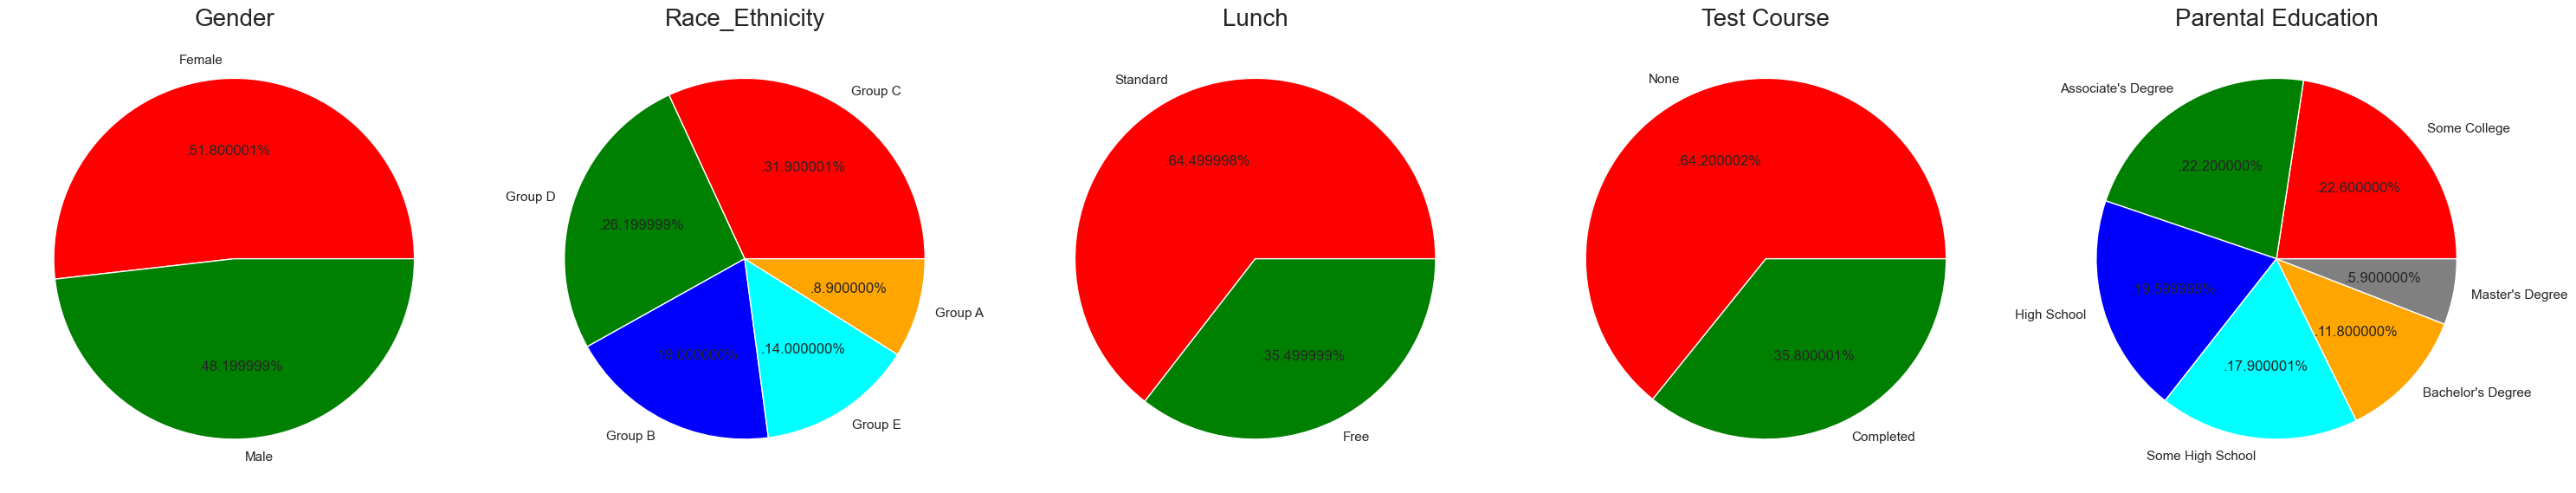

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

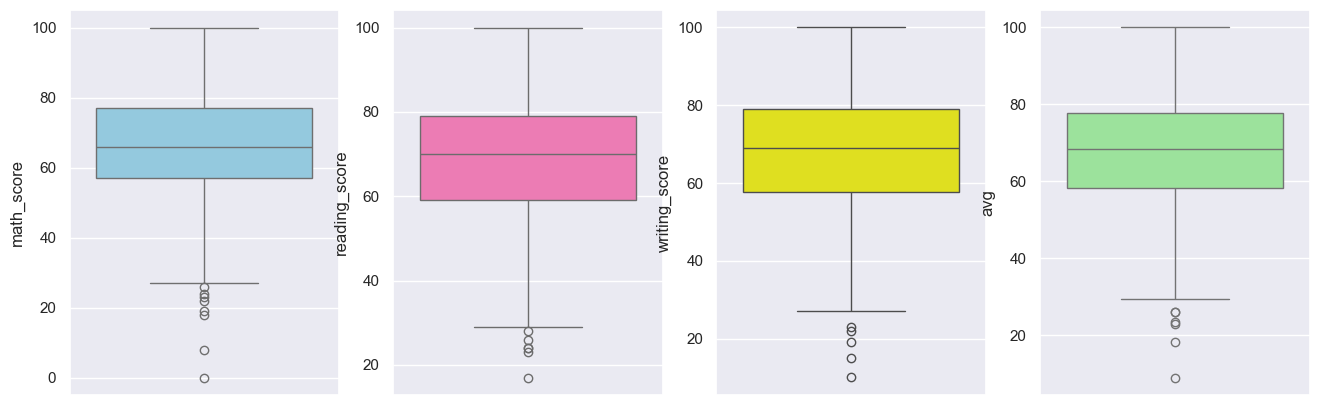

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg'],color='lightgreen')
plt.show()